In [15]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("Dataset/testRaw2.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,id,dt,accel_x,accel_y,accel_z,accel_angle_x,accel_angle_y,accel_angle_z,angle_x,angle_y,angle_z
0,0,0.000,-0.02,-0.05,-0.11,-2.24,5.28,0.0,-0.09,0.21,-0.00
1,1,0.018,0.03,0.07,-0.04,-1.62,4.99,0.0,-0.15,0.40,-0.01
2,2,0.025,0.03,-0.13,0.08,-2.60,4.91,0.0,-0.24,0.59,0.00
3,3,0.026,-0.10,-0.00,-0.14,-1.99,5.74,0.0,-0.27,0.79,-0.05
4,4,0.027,-0.06,0.02,0.04,-1.87,5.39,0.0,-0.35,0.98,-0.06


In [16]:
# for i in data['accel_x']:
#     print(i)

In [17]:
# data['accel_x']=(data['accel_x']-min(data['accel_x']))/(max(data['accel_x']) - min(data['accel_x']))
# data['accel_y']=(data['accel_y']-min(data['accel_y']))/(max(data['accel_y']) - min(data['accel_y']))

In [18]:
# for i in data['accel_x']:
#     print(i)

In [19]:
# data['angle_x']=(data['angle_x']-min(data['angle_x']))/(max(data['angle_x']) - min(data['angle_x']))
# data['angle_y']=(data['angle_y']-min(data['angle_y']))/(max(data['angle_y']) - min(data['angle_y']))

In [20]:
# for i in data['angle_x']:
#     print(i)

In [21]:
x = data['accel_x']
y = data['angle_y']

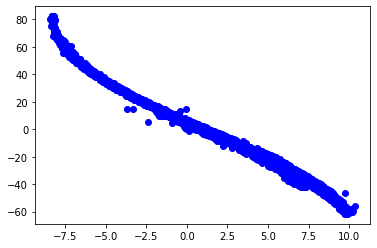

In [22]:
plt.plot(x, y, 'o', color='blue');

In [23]:
#ref: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
df = pd.DataFrame(
    {'X': x,
     'y': y}
)

# Calculate the mean of X and y
xmean = np.mean(x)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 7.238551971632944
beta = -6.465212245745293


In [24]:
x = data['accel_y']
y = data['angle_x']

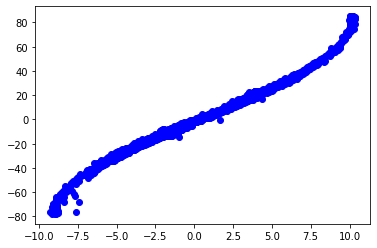

In [25]:
plt.plot(x, y, 'o', color='blue');

In [26]:
#ref: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
df = pd.DataFrame(
    {'X': x,
     'y': y}
)

# Calculate the mean of X and y
xmean = np.mean(x)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = -1.2177560243505825
beta = 6.690670367578819


In [13]:
# x = data['accel_z']
# y = data['angle_x']
# plt.plot(x, y, 'o', color='blue');

In [14]:
# x = data['accel_z']
# y = data['angle_y']
# plt.plot(x, y, 'o', color='blue');